### Importing the Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import sys, os
import warnings
warnings.filterwarnings('ignore')

### Setting the Path for the Script

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
import preprocessing as psr
import eda_script as eda

### Loading the Dataset

In [4]:
filepath = r'C:\Users\Blen\OneDrive\Desktop\10Academy\CreditScoreModeling\data\data.csv'

In [5]:
df = psr.load_data(filepath)

2024-10-04 19:49:14,810 - INFO - Loading the dataset....


### 1. Some Exploration(Overview) on the Dataset

In [6]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### Checking for missing Values

In [8]:
psr.missing_values_table(df)

2024-10-04 19:49:47,190 - INFO - Displaying Missing Value Percentages for Each Column....


The dataframe has 16columns.
There are 0 columns that have missing values.



,Missing Values,% of Total Values,DType


In [9]:
eda.overview_data(df)

2024-10-04 19:52:12,352 - INFO - Printing overview of the data....


Data Overview:
Number of rows: 95662
Number of columns: 16

Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


### 2. Viewing some summary statistics

In [10]:
summary = eda.summary_statistics(df)
print(summary)

2024-10-04 19:52:51,578 - INFO - Printing summary statistics of the data....



Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


### 3. Looking at the Distribution of Numerical and Categorical Data

In [11]:
# Define numerical and categorical columns (you can customize these lists)
numerical_columns = ['Amount', 'Value','CountryCode','PricingStrategy','FraudResult']
categorical_columns = ['ProviderId', 'ProductCategory', 'ChannelId']

2024-10-04 19:56:15,754 - INFO - Visualizing the distribution of numerical features....


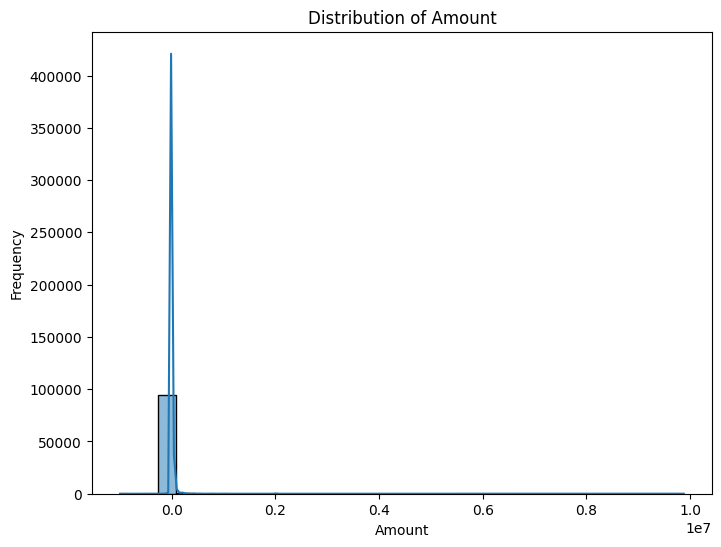

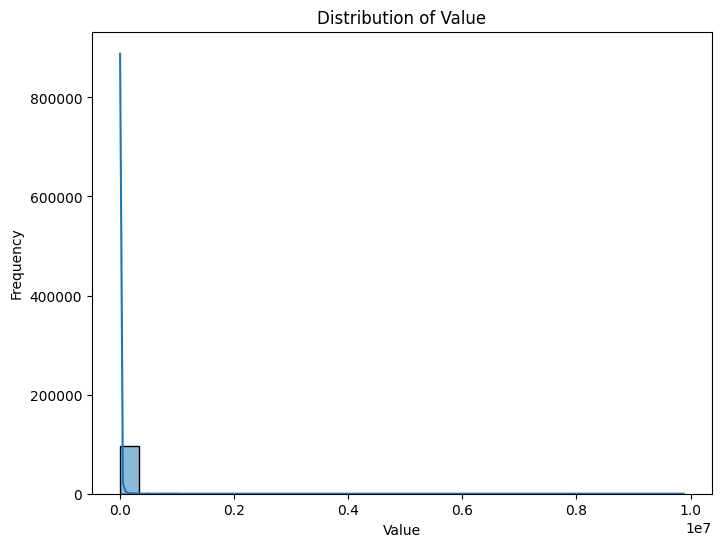

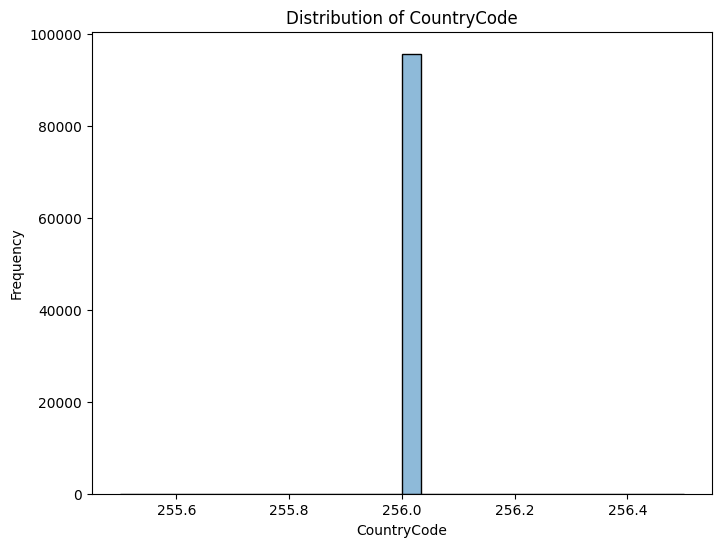

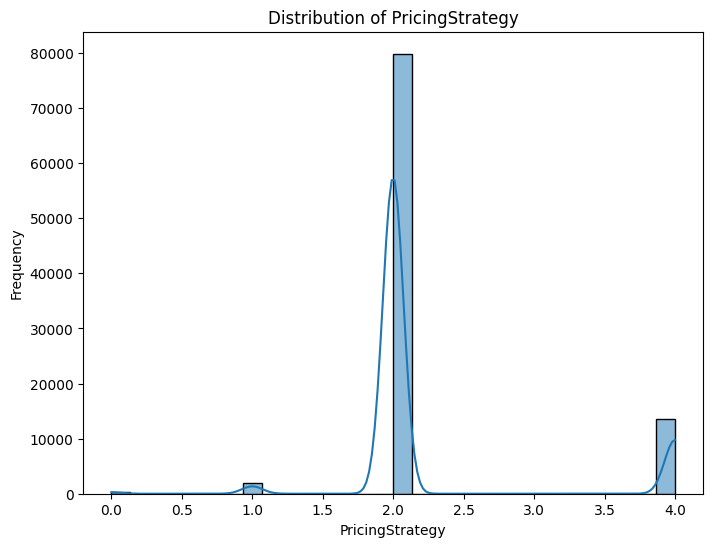

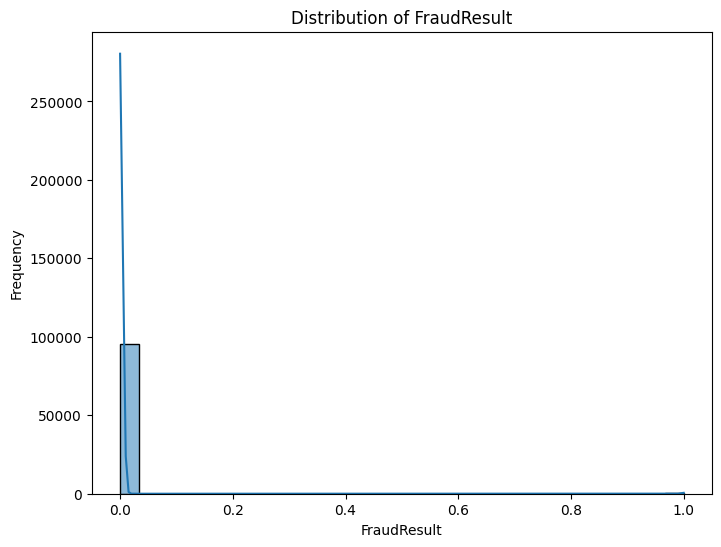

In [12]:
eda.plot_numerical_distributions(df, numerical_columns)

2024-10-04 19:57:22,362 - INFO - Visualizing the distribution of categorical features....


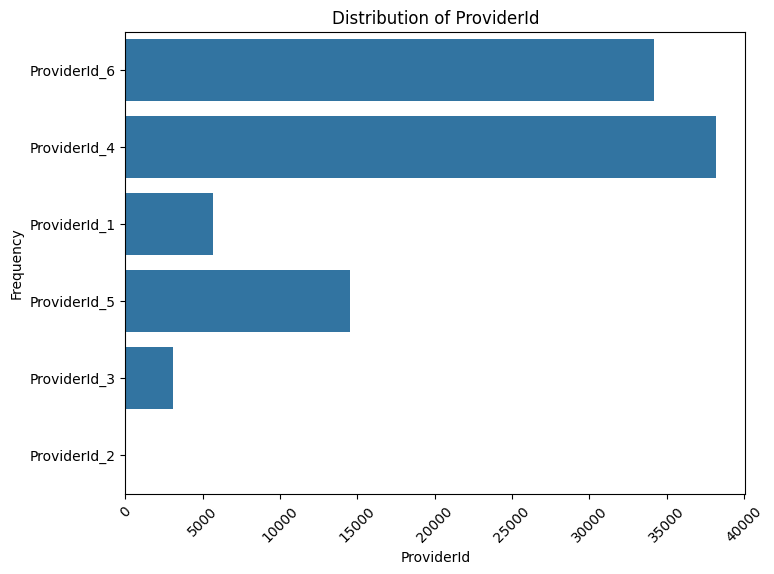

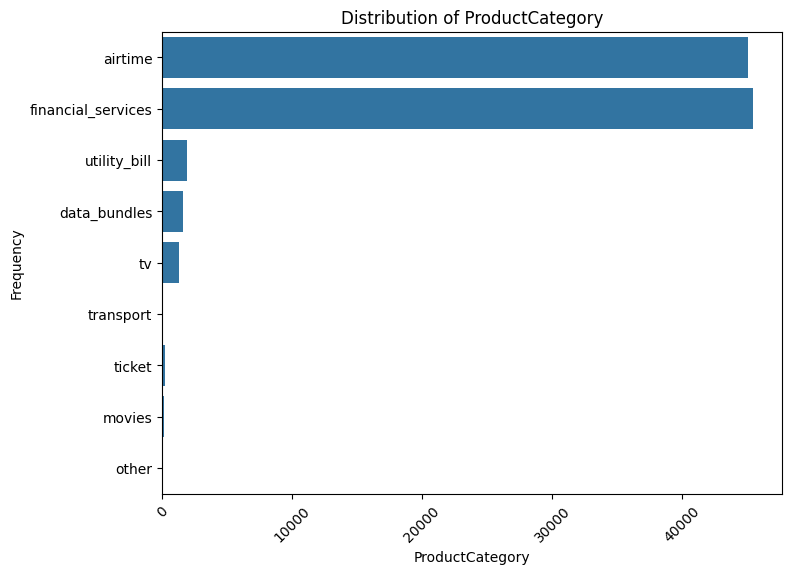

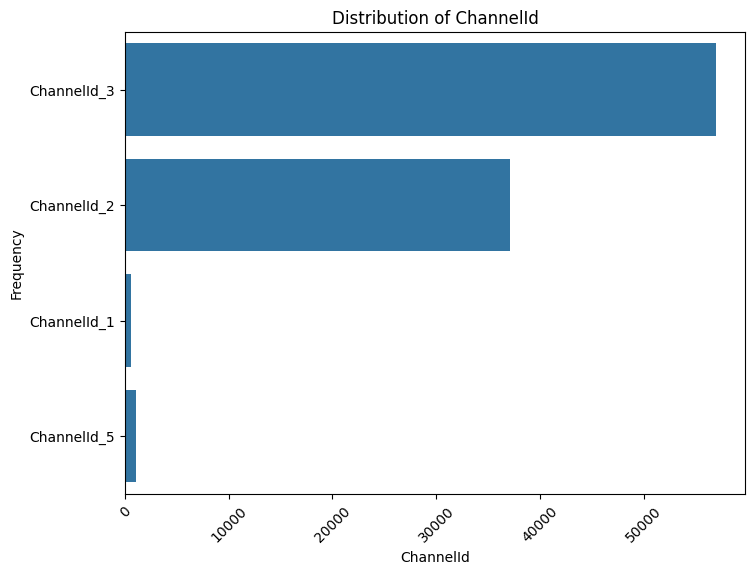

In [13]:
eda.plot_categorical_distributions(df, categorical_columns)

### 4. Correlation Analysis 

2024-10-04 19:59:05,059 - INFO - Plotting the correlation of numerical features....


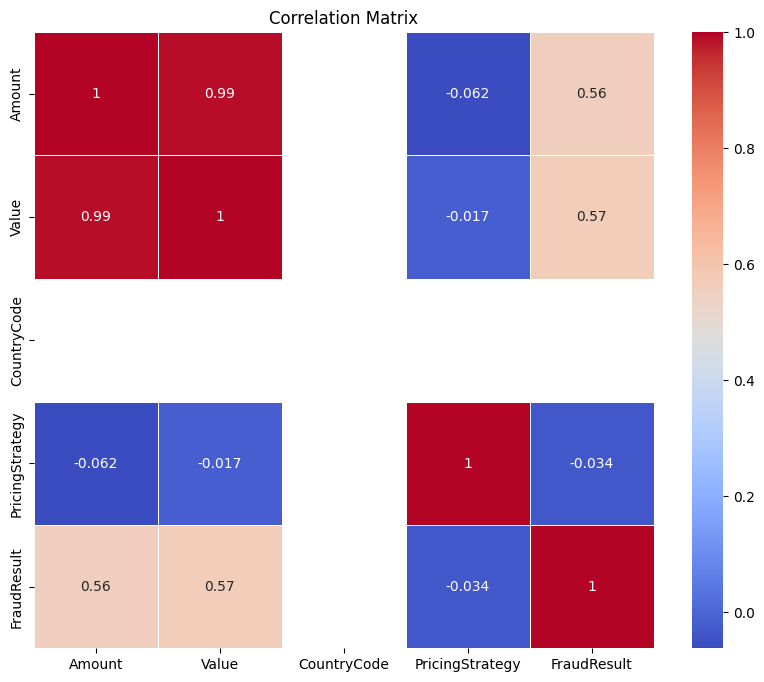

In [14]:
eda.correlation_analysis(df, numerical_columns)

### 5. Detecting Outliers

2024-10-04 20:00:34,210 - INFO - Detecting outliers....


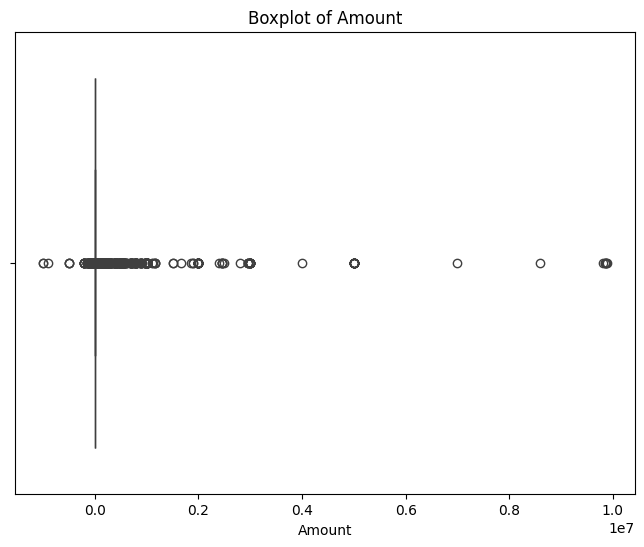

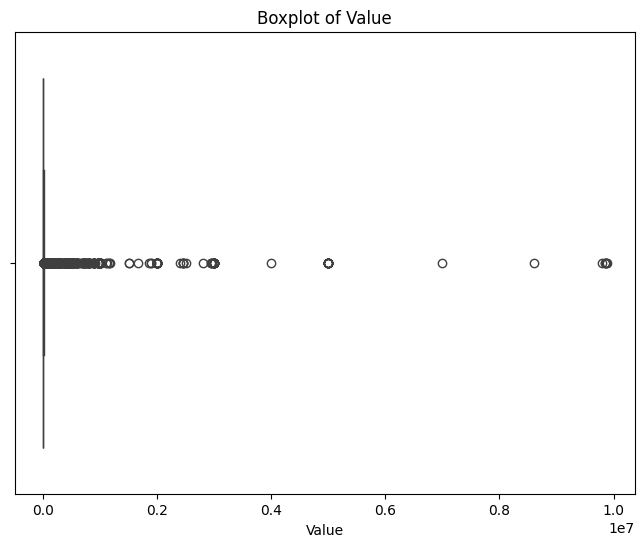

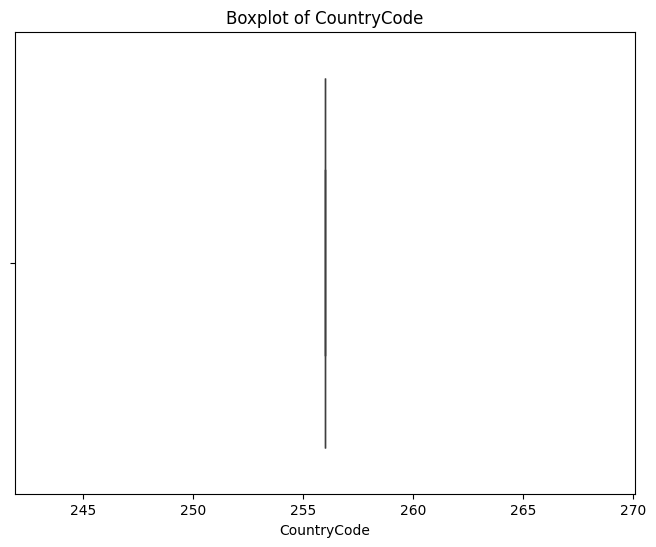

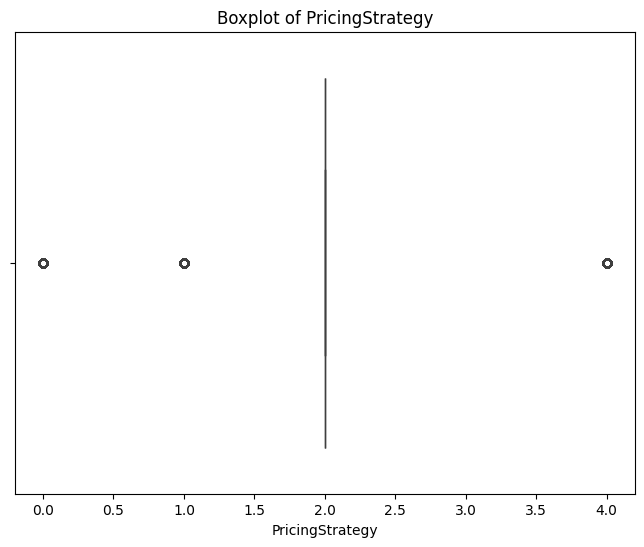

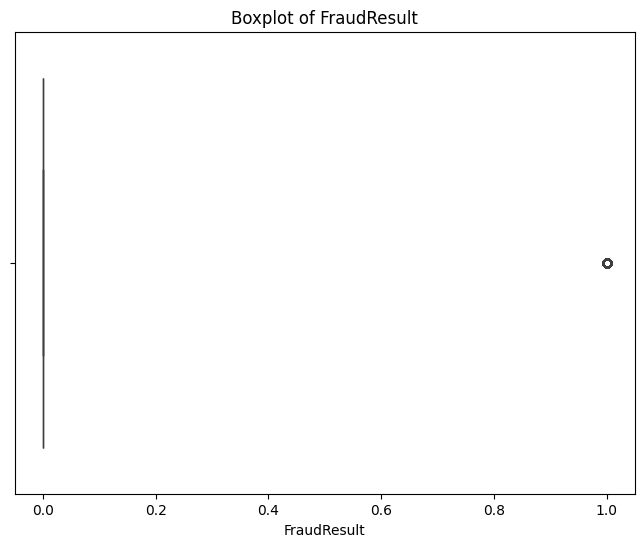

In [15]:
eda.detect_outliers(df, numerical_columns)

### 6. Extra EDA for defining high-risk users

2024-10-04 20:01:38,831 - INFO - Calculating transaction frequence per user....


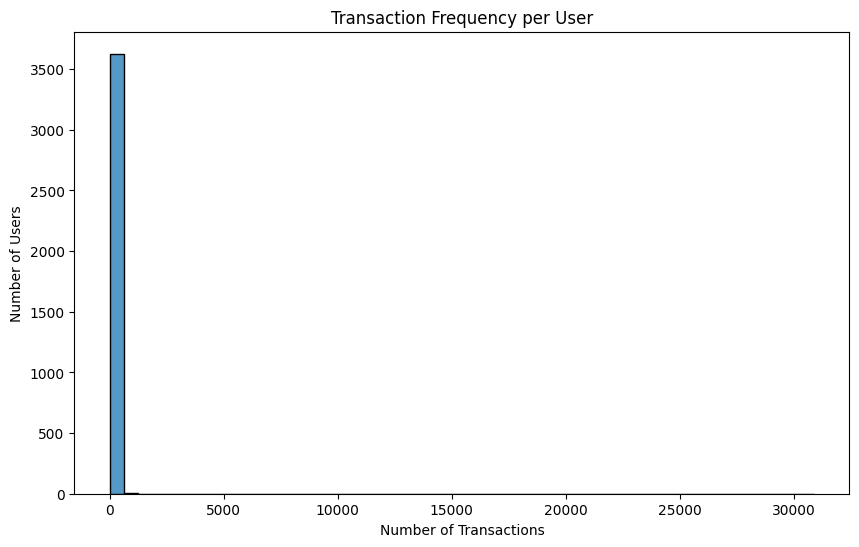

AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_979         1
AccountId_4268        1
AccountId_427         1
AccountId_428         1
AccountId_4295        1
Name: TransactionId, Length: 3633, dtype: int64

In [16]:
eda.transaction_frequency_per_user(df)

2024-10-04 20:02:24,778 - INFO - Visualizing the distribution of transaction amounts based on fraud results....
2024-10-04 20:02:24,846 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-04 20:02:24,898 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


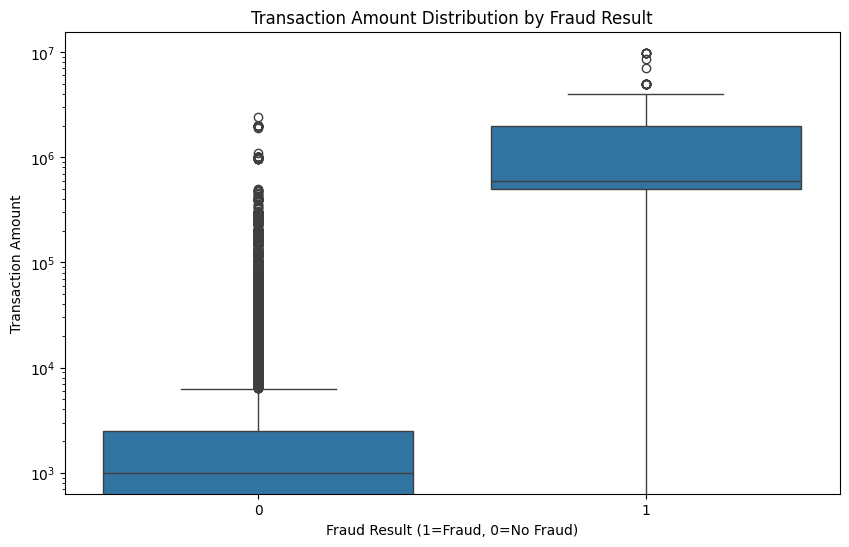

In [17]:
eda.amount_distribution_by_fraud(df)

2024-10-04 20:03:01,604 - INFO - Calculating average transaction frequence per user....


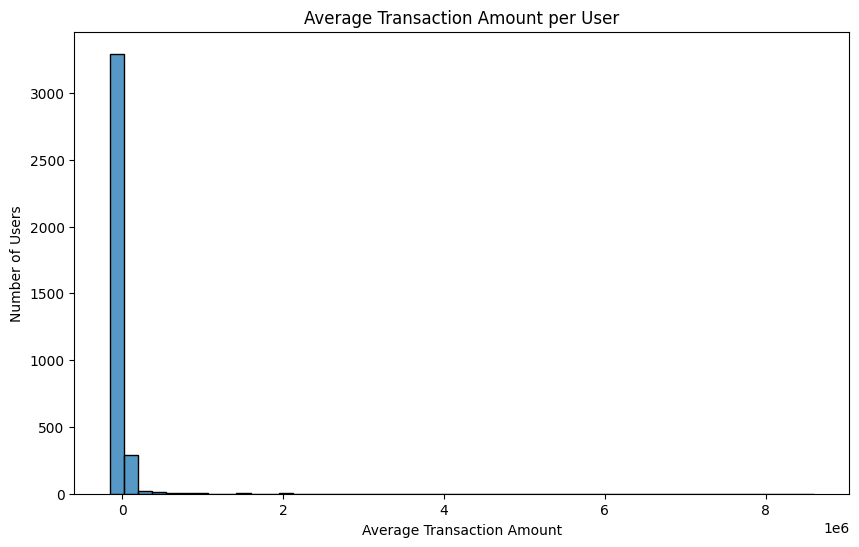

AccountId
AccountId_1178    8.601821e+06
AccountId_3519    2.000000e+06
AccountId_1002    2.000000e+06
AccountId_777     1.850000e+06
AccountId_1480    1.509988e+06
                      ...     
AccountId_1074   -1.000000e+04
AccountId_398    -2.377711e+04
AccountId_4249   -2.525508e+04
AccountId_2420   -5.357143e+04
AccountId_4713   -1.571429e+05
Name: Amount, Length: 3633, dtype: float64

In [18]:
eda.avg_transaction_amount_per_user(df)